# Seattle Vacancy Rates

## Setup

### Import Python packages

In [9]:
import pandas as pd
import censusdata
import seaborn as sns

## Check out how information on vacancy is stored
There are exactly 22 variables in the 2015 American Community Survey that were related to the concept "vacancy." 

In [2]:
samples = censusdata.search('acs5', 2015, 'concept', 'vacancy')
len(samples)

22

Here's a look at all of the vacancy-related information in ACS 2015.

In [3]:
for item in samples:
    print(item)

('B25004_001E', 'B25004.  Vacancy Status', 'Total:')
('B25004_001M', 'B25004.  Vacancy Status', 'Margin Of Error For!!Total:')
('B25004_002E', 'B25004.  Vacancy Status', 'For rent')
('B25004_002M', 'B25004.  Vacancy Status', 'Margin Of Error For!!For rent')
('B25004_003E', 'B25004.  Vacancy Status', 'Rented, not occupied')
('B25004_003M', 'B25004.  Vacancy Status', 'Margin Of Error For!!Rented, not occupied')
('B25004_004E', 'B25004.  Vacancy Status', 'For sale only')
('B25004_004M', 'B25004.  Vacancy Status', 'Margin Of Error For!!For sale only')
('B25004_005E', 'B25004.  Vacancy Status', 'Sold, not occupied')
('B25004_005M', 'B25004.  Vacancy Status', 'Margin Of Error For!!Sold, not occupied')
('B25004_006E', 'B25004.  Vacancy Status', 'For seasonal, recreational, or occasional use')
('B25004_006M', 'B25004.  Vacancy Status', 'Margin Of Error For!!For seasonal, recreational, or occasional use')
('B25004_007E', 'B25004.  Vacancy Status', 'For migrant workers')
('B25004_007M', 'B25004.

Here's a detailed table of just the information in table B25004. I think for the most part these are the variables we'll be most interested in. I'm not sure why we don't see margins of error here, though. We will definitely want those. 

In [4]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B25004'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25004_001E  | B25004.  Vacancy Status        | Total:                                                   | int  
B25004_002E  | B25004.  Vacancy Status        | For rent                                                 | int  
B25004_003E  | B25004.  Vacancy Status        | Rented, not occupied                                     | int  
B25004_004E  | B25004.  Vacancy Status        | For sale only                                            | int  
B25004_005E  | B25004.  Vacancy Status        | Sold, not occupied                                       | int  
B25004_006E  | B25004.  Vacancy Status        | For seasonal, recreational, or occasional use            | int  
B25004_007E  | B25004.  Vacancy Status        | For migrant workers                          

## Zoom in on King County

### Let's start by getting the FIPS number for Washington State

In [5]:
states = censusdata.geographies(censusdata.censusgeo([("state", "*")]), "acs5", 2015)
states["Washington"]

censusgeo((('state', '53'),))

### Then we'll get the FIPS number for King County

In [6]:
counties = censusdata.geographies(
    censusdata.censusgeo([("state", "53"), ("county", "*")]), "acs5", 2015
)
counties["King County, Washington"]

censusgeo((('state', '53'), ('county', '033')))

### Download and store all King County census tracts

In [7]:
king_vac = censusdata.download(
    "acs5",
    2015,
    censusdata.censusgeo([("state", "53"), ("county", "033"), ("block group", "*")]),
    [
        "B25004_001E",
        "B25004_002E",
        "B25004_003E",
        "B25004_004E",
        "B25004_005E",
        "B25004_006E",
        "B25004_007E",
    ],
)

### Print and sort by "Sold, not occupied"
Note the large numbers of dwellings that are sold but not occupied in King County census tracts 70, 96, and 67. 

We'll want to compare this other number — perhaps with the total number of dwellings and total number of people — to put these numbers in context. 

In [46]:
king_vac.sort_values(['B25004_005E']).tail(3)

,B25004_001E,B25004_002E,B25004_003E,B25004_004E,B25004_005E,B25004_006E,B25004_007E
"Block Group 4, Census Tract 67, King County, Washington: Summary level: 150, state:53> county:033> tract:006700> block group:4",144,0,0,0,77,15,0
"Block Group 4, Census Tract 96, King County, Washington: Summary level: 150, state:53> county:033> tract:009600> block group:4",113,0,0,0,85,0,0
"Block Group 2, Census Tract 70, King County, Washington: Summary level: 150, state:53> county:033> tract:007000> block group:2",87,0,0,0,87,0,0


## Histograms

### "For rent"
This category, of apartments that are empty because they are simply for rent, is the distribution with the fattest tail. This is the most numerous type of vacancy. 

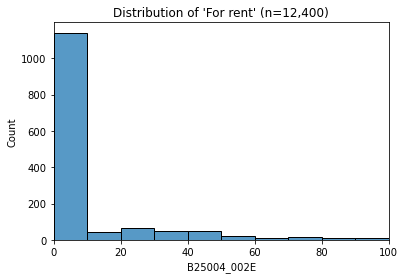

In [38]:
total = king_vac['B25004_002E'].sum()

ax = sns.histplot(data=king_vac, x='B25004_002E', binwidth=10)
_ = ax.set(xlim=(0, 100), title=f"Distribution of 'For rent' (n={total:,})")

### "Rented, not occupied"
This is one of the less numerous categories. I'd like to see us talk to the Census Bureau and find out how long an apartment in this category is typically vacant. Just at the moment of the census? Or does it have to be an extended vacancy?

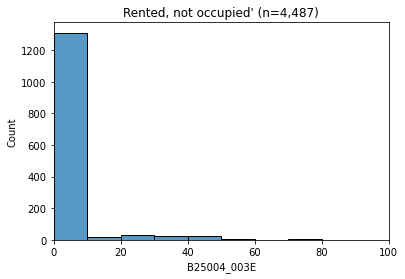

In [41]:
total = king_vac['B25004_003E'].sum()

ax = sns.histplot(data=king_vac, x='B25004_003E', binwidth=10)
_ = ax.set(xlim=(0, 100), title=f"Rented, not occupied' (n={total:,})")

### "Sold, not occupied"
This is the category that I (James) was most interested in from the start. If someone is buying apartments as investments and leaving them vacant, this is where I'd expect to find them. There aren't many of these, but I want to know how long they remain in this state.

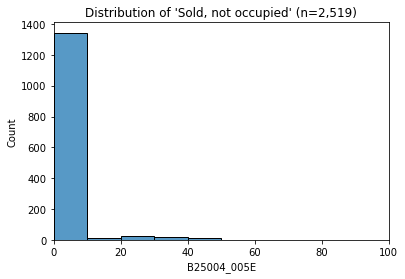

In [43]:
total = king_vac['B25004_005E'].sum()

ax = sns.histplot(data=king_vac, x='B25004_005E', binwidth=10)
_ = ax.set(xlim=(0, 100), title=f"Distribution of 'Sold, not occupied' (n={total:,})")

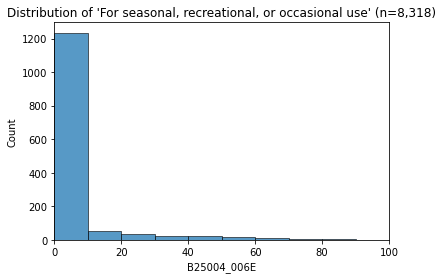

In [44]:
total = king_vac['B25004_006E'].sum()

ax = sns.histplot(data=king_vac, x='B25004_006E', binwidth=10)
_ = ax.set(xlim=(0, 100), title=f"Distribution of 'For seasonal, recreational, or occasional use' (n={total:,})")